# The Three Body Problem  
Using Verlet intergration evolve a 3 body system for position and velocity.  
Calculate angular momentum of the bodies.  
Calculate total energy (potential and kinetic).  
### Verlet  
velocity half step  
$ v_{n+\frac{1}{2}} = v_n +\frac{1}{2} ha (x_n) $  
$ x_{n+1} = x_n +hv_{n+\frac{1}{2}} $  
$ v_{n+1} = v_{n+\frac{1}{2}} +\frac{1}{2} ha (x_{n+1}) $  

$ h $ is timestep  
$ a(x) $ is acceleration at point x. I will calulate using the force function defined near the top, and divide it by mass. So that it in keeping with the other solvers here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc
from cycler import cycler
import pandas as pd

In [2]:
def Grav_eng(pos_e, ma_e, pos_other, ma_other, ep, G):
    """Grav_eng(pos_e, ma_e, pos_other, ma_other):
    Calculates tthe gravtiational energy between two bodies.
    U = -GMm/(r+ep)
    IN:
        pos_e: position of the planet in question. [x,y]
        ma_e: mas of the planet in question.
        pos_other: position of the other planet. [x,y]
        ma_other: mas of the other planet.
        ep: extra bit to make sure the numbers dont blow up to much at low distances.
        G: GRavitational constant.
    OUT:
        g_e: gravitational potential energy."""
    
    dif = pos_other-pos_e
    g_e = (-G * ma_e *ma_other) / (np.linalg.norm(dif+ep))

    return g_e

In [3]:
def Kin_eng(vel_e, m_e):
    """Kin_eng(vel_e, m_e):
    Calculate the kinetic energy.
    E = 0.5mv^2
    IN:
        vel_e: velocity of a body. [vx,vy]
        m_e: mass of the planet in question.
    OUT:
        k_e: Kinetic energy of the body."""
    
    k_e = 0.5*m_e*vel_e**2
    k_e = np.linalg.norm(k_e)

    return k_e

In [4]:
def Angular_momentum():
    """A function which calculates the angular momentum of the system.
    IN:
    OUT:"""

In [5]:
def Acceleration( pos_a, ma_a, pos_other, ep, G, n):
    """Acceleration( pos_a, ma_a, pos_other, ma_other, ep, G):
    A function for calculating the gravitational acceleration between two bodies.
    g = GM/r^2
    IN:
        pos_a: position of the planet in question. [x,y]
        ma_a: An array of all of the planetary masses.
        pos_other: position of the other body. [x,y]
        ep: extra bit to make sure the numbers dont blow up to much at low distances.
        G: Gravitational constant.
    OUT:
        g_e: gravitational potential energy"""
    
    x_acc = np.array([])
    y_acc = np.array([])

    #print(f"len(ma) {len(ma)},, ma {ma}")
    for g in range(len(ma_a)):
        #print(f"g {g}")
        if pos_other[g].all()==pos_a.all():
            continue
        else:

            dif = pos_a - pos_other[g]               #CHANGE: Calculated dif in one go (didnt split x,y components). Also swapped their order in subtraction.

            
            acc_temp = (-1*ma_a[g]*dif)/ (np.linalg.norm(dif + ep)**3)            #CHANGE: Changed mass on numerator, and input of np.linalg.norm

            #print(f"acc_temp {acc_temp}")
    
            x_acc = np.append(x_acc, acc_temp[0])
            y_acc = np.append(y_acc, acc_temp[1])
        print(f"num {n}, g {g}, x_acc {x_acc}, y_acc {y_acc}")
        

        


    x_acc = np.sum(x_acc)
    y_acc = np.sum(y_acc)
    #print(f"sum of x_acc {x_acc}, y_acc {y_acc}")
    return x_acc, y_acc


In [6]:
def Verlet(pos_v, vel_v, ma, ep, G, t_s):
    """A function that runs a single loop of a verlet intergrator.
    IN:
        pos_v: an array holding the positions of al the planets at the beginning of a tine step.
        vel_v: an array holding the velocities at the begining of a time step.
        ma: an array holding the mass of all of the planets.
        ep: extra bit to make sure the numbers dont blow up to much at low distances.
        G: gravitational constant.
        t_s: time step.
    OUT:
        pos_full: an array holding the position of all the bodies at the end of a time step
        vel_full: an array holding the velocities of all the bodies at the end of a time step
        """
    pos_full = np.array([])
    vel_full = np.array([])

    for v in range(len(ma)):
        ax_half, ay_half = Acceleration(pos_a = pos_v[v], ma_a = ma, pos_other = pos_v, ep = ep, G = G, n = v)     #x and y componets of acceleration fro half step

        vx_half = vel_v[v,0] + (0.5 * t_s * ax_half)                                                          #Caclcualting the halfstep velocities for a planet
        vy_half = vel_v[v,1] + (0.5 * t_s * ay_half)

        x_full = pos_v[v,0] + (t_s * vx_half)     #Caclcualting the fullstep positions for a planet
        y_full = pos_v[v,1] + (t_s * vy_half)

        if pos_full.shape ==(0,):
            pos_full = np.array([x_full, y_full])
        else:
            pos_full = np.vstack((pos_full, np.array([x_full, y_full])))
        print(f"v {v}")
        
    for ve in range(len(ma)):
        print(f"pos_full[ve] {pos_full[ve]}")
        ax_full, ay_full = Acceleration(pos_a = pos_full[ve], ma_a = ma, pos_other = pos_full, ep = ep, G = G, n = ve)     #x and y componets of accelreation for full step
        #print(f"vx_half {vx_half}, vy_half {vy_half}")
        vx_full = vx_half + (0.5 * t_s * ax_full)     #Caclcualting the fullstep velocities for a planet
        vy_full = vy_half + (0.5 * t_s * ay_full)
        
        if vel_full.shape ==(0,):
            vel_full = np.array([vx_full, vy_full])
        else:
            vel_full= np.vstack((vel_full, np.array([vx_full, vy_full])))
        print(f"ve {ve}")
        
    return pos_full, vel_full

### Importing data and setting initial conditions
Initial conditions are stored in a data file

In [7]:
data = pd.read_csv("3 body input and tests.txt",delim_whitespace=True)
data

C:\Users\bs583\AppData\Local\Temp\ipykernel_22140\1046484261.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("3 body input and tests.txt",delim_whitespace=True)


,name,pos1x,pos1y,pos2x,pos2y,pos3x,pos3y,vel1x,vel1y,vel2x,vel2y,vel3x,vel3y,m1,m2,m3
0,Test1,0,0,1,0,0,0.000,0.0000,0.0000,0.0000,10.0000,0.0000,0.0000,100,1,0
1,Test2,1,1,-1,-1,0,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,10,10,0
2,Test3,1,0,-1,0,0,0.000,0.0000,5.0000,0.0000,-5.0000,0.0000,0.0000,10,10,0
3,Test4,1,3,2,2,0,0.000,3.0000,2.0000,1.0000,2.0000,0.0000,0.0000,2,2,0
4,Test5,1,1,-1,-2,3,-2.000,1.0000,1.0000,2.0000,2.0000,-1.0000,-2.0000,1,1,1
5,Test6,0,0,2,0,1,1.732,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5,5,5
6,Test7,1,1,-2,1,4,1.000,0.0000,0.0000,0.0000,5.0000,0.0000,-5.0000,100,5,5
7,Test8,1,1,-2,1,4,1.000,1.0000,-0.5000,0.0000,5.0000,0.0000,-5.0000,100,5,5
8,FigOf8,-1,0,1,0,0,0.000,0.3471,0.5327,0.3471,0.5327,-0.6942,-1.0654,1,1,1
9,Bfly1,-1,0,1,0,0,0.000,0.3068,0.1255,0.3068,0.1255,-0.6136,0.2510,1,1,1


In [8]:
initial = 0
in_con = data.iloc[initial]

masses = np.array([in_con.loc["m1"], in_con.loc["m2"], in_con.loc["m3"]])
i_positions = np.array([[in_con.loc["pos1x"],in_con.loc["pos1y"]], [in_con.loc["pos2x"],in_con.loc["pos2y"]], [in_con.loc["pos3x"],in_con.loc["pos3y"]]])
i_velocities = np.array([[in_con.loc["vel1x"],in_con.loc["vel1y"]], [in_con.loc["vel2x"],in_con.loc["vel2y"]], [in_con.loc["vel3x"],in_con.loc["vel3y"]]])

for i in range(len(masses)):
    if masses[i] == 0:
        masses = np.delete(masses, i)
        i_positions = np.delete(i_positions, i, 0)
        i_velocities = np.delete(i_velocities, i, 0)


i_positions

array([[0., 0.],
       [1., 0.]])

In [9]:
fin = 20
time_step = 0.4
no_steps = int(fin/time_step)
epsilon = 0.01
G = 1
no_steps = 10

In [10]:
file = open("produced_data.txt", "w")
file.write("px1" + "\t" + "p1y" + "\t" + "p2x" + "\t" + "p2y" + "\t" + "p3x" + "\t" + "p3y" + "\t" + "vx1" + "\t" + "v1y" + "\t" + "v2x" + "\t" + "v2y" + "\t" + "v3x" + "\t" + "v3y" + "\t" + "Energy" + "\t" + "ang_mom")
#file.close()


62

### running everything

In [11]:
help(Verlet)

Help on function Verlet in module __main__:

Verlet(pos_v, vel_v, ma, ep, G, t_s)
    A function that runs a single loop of a verlet intergrator.
    IN:
        pos_v: an array holding the positions of al the planets at the beginning of a tine step.
        vel_v: an array holding the velocities at the begining of a time step.
        ma: an array holding the mass of all of the planets.
        ep: extra bit to make sure the numbers dont blow up to much at low distances.
        G: gravitational constant.
        t_s: time step.
    OUT:
        pos_full: an array holding the position of all the bodies at the end of a time step
        vel_full: an array holding the velocities of all the bodies at the end of a time step



In [12]:
#pos

v 0
v 1
pos_full[ve] [0. 0.]
num 0, g 1, x_acc [0.01439336], y_acc [0.05757345]
ve 0
pos_full[ve] [1. 4.]
num 1, g 0, x_acc [-1.41415891], y_acc [-5.65663565]
ve 1
num 0, g 1, x_acc [0.01439336], y_acc [0.05757345]
v 0
num 1, g 0, x_acc [-1.41415891], y_acc [-5.65663565]
v 1
pos_full[ve] [2.30293784e-03 4.00921175e+00]
ve 0
pos_full[ve] [0.77373457 7.0949383 ]
ve 1
v 0
v 1
pos_full[ve] [-0.22396249  7.10415005]
ve 0
pos_full[ve] [ 0.54746915 10.18987659]
ve 1
v 0
v 1
pos_full[ve] [-0.45022791 10.19908834]
ve 0
pos_full[ve] [ 0.32120372 13.28481489]
ve 1
v 0
v 1
pos_full[ve] [-0.67649334 13.29402664]
ve 0
pos_full[ve] [ 0.0949383  16.37975318]
ve 1
v 0
v 1
pos_full[ve] [-0.90275877 16.38896493]
ve 0
pos_full[ve] [-0.13132713 19.47469148]
ve 1
v 0
v 1
pos_full[ve] [-1.12902419 19.48390323]
ve 0
pos_full[ve] [-0.35759256 22.56962977]
ve 1
v 0
v 1
pos_full[ve] [-1.35528962 22.57884152]
ve 0
pos_full[ve] [-0.58385798 25.66456807]
ve 1
v 0
v 1
pos_full[ve] [-1.58155505 25.67377982]
ve 0
pos_

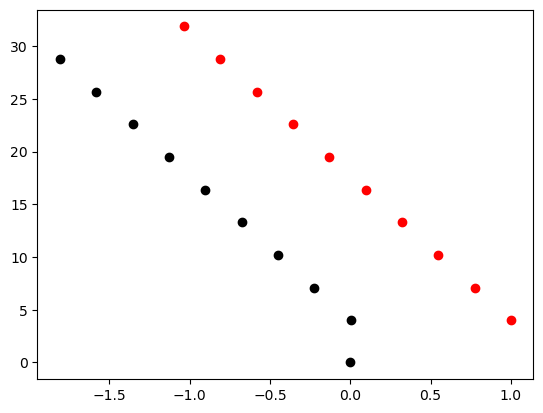

In [13]:
pos = i_positions
vel = i_velocities
fig =  plt.figure()
ax = fig.add_subplot()
for i in range(no_steps):
    #print(f"pos {pos}")
    new_pos, new_vel = Verlet(pos, vel, masses, epsilon, G, time_step)
    #print(new_pos)
    pos = new_pos
    vel = new_vel
    ax.scatter(pos[0,0], pos[0,1], color = "k")
    ax.scatter(pos[1,0] ,pos[1,1], color = "red")
    